Topic Analysis using LDA

In [1]:
#libraries
#libraries needed
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
## Download Once #run once and comment it out to avoid it downloading multiple times
#nltk.download('stopwords') 
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import gensim.downloader as api

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

ImportError: DLL load failed while importing ft2font: The specified module could not be found.

In [102]:
#Importing libraries and loading data

import pandas as pd

tweetdata = pd.read_csv('sentiment.csv')

tweetdata.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,0,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,NaN,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0
1,1,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1
2,2,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0
3,3,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0
4,4,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0


Data Cleaning


In [103]:
tweetdata['location'] = tweetdata['location'].fillna('Unknown')
tweetdata.head(5)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,0,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,Unknown,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0
1,1,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1
2,2,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0
3,3,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0
4,4,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0


In [104]:
## Cleaning Tweets data
eng_stop_words = list(stopwords.words('english'))
emoji = list(UNICODE_EMOJI.keys())

def clean_tweets(tweet):
    tweet = tweet.lower()  #lowercase
    tweet = re.sub('@[^\s]+','',tweet)  # Removing Usernames
    tweet = re.sub('http[^\s]+','',tweet) # Removing URLs.
    tweet = re.sub(r"www.\S+", "", tweet)
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet) # Removing mentions
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet) # Removing Hashtags
    tweet = re.sub(r"amp", "", tweet)

    punct = str.maketrans('', '', string.punctuation+string.digits) # Removing Punctuations
    tweet = tweet.translate(punct)

    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(tweet)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    tweet = " ".join(lemma_words)

    return tweet





<>:7: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \s
C:\Users\pdhiman\AppData\Local\Temp\ipykernel_11236\3216027062.py:7: DeprecationWarning: invalid escape sequence \s
  tweet = re.sub('@[^\s]+','',tweet)  # Removing Usernames
C:\Users\pdhiman\AppData\Local\Temp\ipykernel_11236\3216027062.py:8: DeprecationWarning: invalid escape sequence \s
  tweet = re.sub('http[^\s]+','',tweet) # Removing URLs.


In [105]:
tweetdata['tweet_text_processed'] = tweetdata['tweet'].apply(clean_tweets)
tweetdata.head(5)

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,tweet_text_processed
0,0,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/loremipsum_2020/status/158...,loremipsum_2020,Twitter for iPhone,Unknown,@GHOSTofSURF @ThatEricAlper Always on spot! 🤪,0,0,always spot
1,1,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/grtamericanovel/status/158...,grtamericanovel,Twitter Web App,"Connecticut, USA",@GreenwaldEd @MadeInTheUSANJ @RepMTG If #GOP g...,2,1,get majority dont mtg cld head house cmte marc...
2,2,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/buildurlife/status/1587595...,buildurlife,Twitter for Android,BBB 🫧,Let's vote! We have a chance to give them more...,0,0,let vote chance give exposure social medium do...
3,3,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/MMayhem2020/status/1587595...,MMayhem2020,Twitter for iPhone,Red State USA,This is @KathyHochul NY. Get out and vote for ...,0,0,ny get vote
4,4,2022-11-01 23:59:59+00:00,1.587600e+18,https://twitter.com/trevormdale/status/1587595...,trevormdale,Twitter for Android,"Minnesota, USA",@tophat595 @KihneSheila Thanks democrats! You ...,1,0,thanks democrat ruin everything


In [69]:
# #Removing Emojis
# import emoji
    
# def give_emoji_free_text( text):
#     allchars = [str for str in text]
#     emoji_list = [c for c in allchars if c in emoji.EMOJI_DATA]
#     clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
        
#     return clean_text

In [84]:
# tweetdata['tweet_text_processed'] = tweetdata['tweet_text_processed'].apply(give_emoji_free_text)
# tweetdata.head(5)

In [85]:
# #Removing Stop words

# stop = stopwords.words('english')
# tweetdata['tweet_text_processed'] = tweetdata['tweet_text_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# tweetdata.head()

In [106]:
# Print out the first rows of papers
tweetdata['tweet_text_processed'].head()

0                                          always spot
1    get majority dont mtg cld head house cmte marc...
2    let vote chance give exposure social medium do...
3                                          ny get vote
4                      thanks democrat ruin everything
Name: tweet_text_processed, dtype: object

Exploratory analysis 

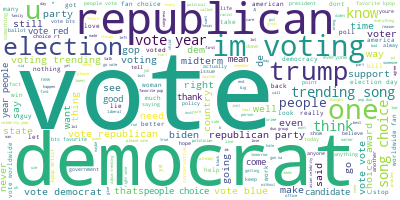

In [107]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(tweetdata['tweet_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Preparing for LDA Analysis


In [108]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = tweetdata.tweet_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['always', 'spot']


In [109]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1)]


In [110]:
print(id2word)

Dictionary(63688 unique tokens: ['always', 'spot', 'army', 'cld', 'cmte']...)


LDA Model TRainig


In [111]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"election" + 0.027*"democrat" + 0.022*"vote" + 0.014*"republican" + '
  '0.012*"voting" + 0.008*"would" + 0.008*"get" + 0.007*"like" + 0.007*"biden" '
  '+ 0.006*"people"'),
 (1,
  '0.061*"voting" + 0.035*"im" + 0.035*"vote" + 0.027*"trending" + '
  '0.026*"song" + 0.024*"choice" + 0.015*"election" + 0.007*"favorite" + '
  '0.007*"day" + 0.007*"tomorrow"'),
 (2,
  '0.046*"vote" + 0.017*"democrat" + 0.011*"republican" + 0.011*"voting" + '
  '0.007*"new" + 0.006*"one" + 0.006*"jin" + 0.005*"would" + 0.005*"album" + '
  '0.005*"always"'),
 (3,
  '0.041*"vote" + 0.018*"want" + 0.016*"democrat" + 0.012*"dont" + '
  '0.011*"people" + 0.011*"republican" + 0.010*"voting" + 0.010*"one" + '
  '0.007*"think" + 0.007*"like"'),
 (4,
  '0.051*"vote" + 0.017*"republican" + 0.013*"election" + 0.010*"democrat" + '
  '0.010*"get" + 0.008*"trump" + 0.008*"day" + 0.007*"state" + 0.007*"red" + '
  '0.006*"party"'),
 (5,
  '0.051*"vote" + 0.029*"republican" + 0.021*"people" + 0.015*"year" + '


Analysis LDA Model Results

In [112]:
#import pyLDAvis.gensim
import pyLDAvis.gensim_models 
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

c:\Users\pdhiman\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.036152  0.040741       1        1  19.955513
9      0.032403  0.049389       2        1  12.256045
4      0.039808  0.031944       3        1  12.055257
3      0.049419  0.031889       4        1  11.736262
5      0.036095  0.005606       5        1  11.545380
8      0.007649 -0.004492       6        1   9.259372
7     -0.041678 -0.004387       7        1   6.825851
1      0.030041 -0.158061       8        1   6.455960
2     -0.005613 -0.000924       9        1   5.363275
6     -0.184276  0.008295      10        1   4.547083, topic_info=            Term          Freq         Total Category  logprob  loglift
209       voting  14252.000000  14252.000000  Default  30.0000  30.0000
39          vote  54330.000000  54330.000000  Default  29.0000  29.0000
900           im   5349.000000   5349.000000  Default  28.0000  28.0000
4437    trending   2197.000000   2197.000000  Default  27.0000  27.0000
1192        song   2250.000000   2250.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
179          say    173.000059   3229.230539  Topic10  -5.7221   0.1640
158       people    189.679929   9099.144589  Topic10  -5.6300  -0.7799
181        trump    145.510089   5098.155473  Topic10  -5.8951  -0.4657
91    republican    153.038295  16495.455557  Topic10  -5.8447  -1.5895
299         time    135.044919   3808.611958  Topic10  -5.9698  -0.2487

[902 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
21240      1  0.971539       aaa
11864      1  0.976298     aaron
21929     10  0.941137       abe
10463      2  0.028081    abroad
10463      4  0.028081    abroad
...      ...       ...       ...
9774       7  0.067918       おはよ
19407     10  0.931729  今日もよろしくね
2636       9  0.994508    방탄소년단진
26311      9  0.971144        진짜
15767      3  0.942164        하루

[3196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 5, 4, 6, 9, 8, 2, 3, 7])

In [113]:
data_dict = {'dominant_topic':[], 'perc_contribution':[], 'topic_keywords':[]}

for i, row in enumerate(lda_model[corpus]):
    #print(i)
    row = sorted(row, key=lambda x: x[1], reverse=True)
    #print(row)
    for j, (topic_num, prop_topic) in enumerate(row):
        wp = lda_model.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        data_dict['dominant_topic'].append(int(topic_num))
        data_dict['perc_contribution'].append(round(prop_topic, 3))
        data_dict['topic_keywords'].append(topic_keywords)
        #print(topic_keywords)
        break

df_topics = pd.DataFrame(data_dict)

contents = pd.Series(texts)

#df_topics['post'] = df['post']
df_topics.head()

,dominant_topic,perc_contribution,topic_keywords
0,2,0.700,"vote, democrat, republican, voting, new, one, ..."
1,3,0.964,"vote, want, democrat, dont, people, republican..."
2,3,0.748,"vote, want, democrat, dont, people, republican..."
3,3,0.775,"vote, want, democrat, dont, people, republican..."
4,9,0.820,"vote, democrat, republican, election, trump, p..."
